In [142]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
sns.set()
plt.figure(figsize = (8,5))
import statsmodels.api as sm
import pylab as pl
import scipy

In [143]:
#importing master dataset
df=pd.read_csv('master.xlsx - Sheet1.csv')

#adding a completion row
def Completion (row):
    if row['Reason for Discharge'] == 'Completed program':
        return 1
    if row['Reason for Discharge']=='Transferred to other program':
        return 1
    return 0
df.apply (lambda row: Completion (row), axis=1)
df['Completion']=df.apply(lambda row: Completion (row),axis=1)
df.sample(3)
#df.columns.values

,Unnamed: 0,Form Date_admission,Program,Staff_admission,Client Number,Age,Age of first use (Primary),Age of first use (Secondary),Age of first use (Tertiary),Are any children living with someone else due to CPS court order or other action,...,Client_number,Code,start_service_data,end_service_data,data_birth,gender,race,number_hours,year,Completion
1791,1791,2017-06-30 00:00:00,Family Residential,"Schurhamer, Mollie",111156728,NaN,9,15,24,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
218,218,2015-08-25 00:00:00,Family Residential,"Stewart, Lorene",111156369,NaN,21,NaN,NaN,Not applicable - No children/no child protect ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2231,2231,2017-07-05 00:00:00,Treatment - IDD Women,"Pramann, Katie",111164730,NaN,33,NaN,NaN,Not applicable - No children/no child protect ...,...,111164730,H2035 HH HQ0944: IDD - Group - Drug,2017-07-05 00:00:00,2017-07-05 00:00:00,1978-07-12 00:00:00,Female,White,2.0,2017.0,0


In [98]:
#drop duplicate clients
df.drop_duplicates(subset='Client Number',inplace=True)
df.head()

,Unnamed: 0,Form Date_admission,Program,Staff_admission,Client Number,Age,Age of first use (Primary),Age of first use (Secondary),Age of first use (Tertiary),Are any children living with someone else due to CPS court order or other action,...,Client_number,Code,start_service_data,end_service_data,data_birth,gender,race,number_hours,year,Completion
0,0,2014-11-20 00:00:00,Treatment - IDD Men,"Schroer, Dan",111156570,NaN,14,0,0,Not applicable - No children/no child protect ...,...,111156570,H2035 HH HQ0944: IDD - Group - Drug,2014-11-19 00:00:00,2014-12-31 00:00:00,1994-01-15 00:00:00,Male,White,89.0,2014.0,1
2,2,2014-12-09 00:00:00,Treatment - IDD Men,"Lipsco, Sheila",111156740,NaN,16,7,0,Not applicable - No children/no child protect ...,...,111156740,H2035 HH HQ0944: IDD - Group - Drug,2014-12-05 00:00:00,2014-12-31 00:00:00,1972-05-21 00:00:00,Male,White,59.5,2014.0,0
4,4,2014-11-18 00:00:00,Treatment - IDD Men,"Salsness, Carrie",111156628,NaN,19,12,14,Not applicable - No children/no child protect ...,...,111156628,H2035 HH HQ0944: IDD - Group - Drug,2014-11-18 00:00:00,2014-12-01 00:00:00,1972-12-13 00:00:00,Male,Black or African American,25.0,2014.0,0
6,6,2014-11-14 00:00:00,Treatment - IDD Women,"Salsness, Carrie",111156559,NaN,17,12,12,Not applicable - No children/no child protect ...,...,111156559,H2035 HH HQ0944: IDD - Group - Drug,2014-11-14 00:00:00,2014-12-31 00:00:00,1993-02-15 00:00:00,Female,White,96.0,2014.0,1
8,8,2014-11-17 00:00:00,Treatment - IDD Men,"Salsness, Carrie",4799,NaN,16,9,9,Not applicable - No children/no child protect ...,...,4799,H2035 HH0944: IDD - Individual - Drug,2014-11-19 00:00:00,2014-12-30 00:00:00,1965-06-24 00:00:00,Male,Black or African American,72.0,2014.0,1


***
# EDA
## Variables Included in Analysis:
1) Reasons for Discharge<br>
2) Gender<br>
3) Race<br>
4) Age<br>
5) CHSR Dimensions (Logistic Regression and Heatmap)<br>
6) Labor Force Status (Logistic Regression and Heatmap)<br>
7) Where Client has been Living in the Past 30 Days<br>
8) Does Client have Children<br>
9) DSM CD Diagnosis


## 1) Reasons for Discharge

AxesSubplot(0.125,0.125;0.775x0.755)


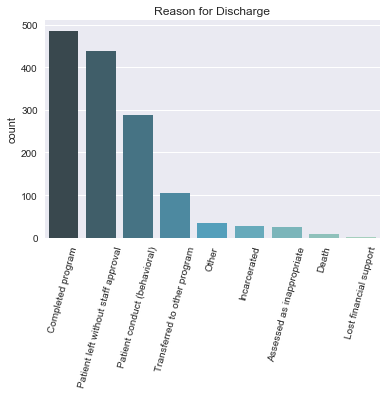

In [99]:
a=sns.countplot(data=df,x='Reason for Discharge',order=df['Reason for Discharge'].value_counts().index,palette='GnBu_d')
a.set_xticklabels(a.get_xticklabels(), rotation=75)
a.set_xlabel('')
a.set_title('Reason for Discharge')
print(a)

### Summary
- The three most common reasons for clients leaving treatment are as follows:
 - Completing the program
 - Leaving without staff approval
 - Client conduct (behavioral issues)

***
## 2) Gender

AxesSubplot(0.125,0.125;0.775x0.755)


,Completion Rate(%),Gender
0,40.1,Female
1,39.4,Male
2,00.0,Unknown


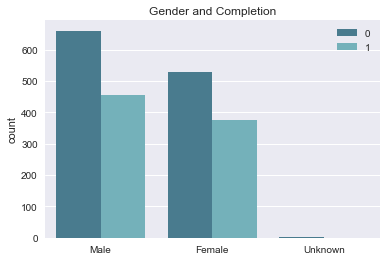

In [162]:
b=sns.countplot(data=df, x='gender', hue='Completion',palette='GnBu_d')
b.set_xlabel('')
b.legend(loc=1)
b.set_title('Gender and Completion')
print(b)
tab1_cr = {'Gender': ['Female','Male','Unknown'],
           'Completion Rate(%)':['40.1','39.4','00.0']}
tab1_cr = pd.DataFrame(data=tab1_cr)
tab1_cr
#tab1 = pd.crosstab(df['gender'], df['Completion'])
#tab1

***
## 3) Race

AxesSubplot(0.125,0.125;0.775x0.755)


,Completion Rate(%),Race
0,31.7,American Indian or Alaska Native
1,28.6,Asian
2,45.5,Black or African American
3,32.4,Declined to Specify
4,58.5,Hispanic or Latino
5,0.00,Native Hawaiian or Other Pacific Islander
6,41.9,Other
7,38.6,White


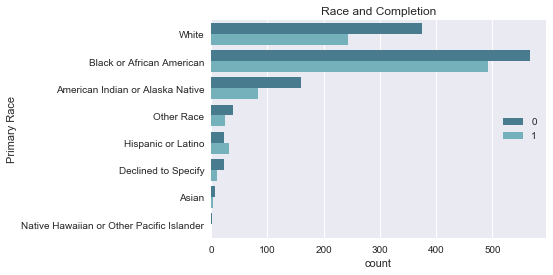

In [161]:
c=sns.countplot(data=df, y='Race1', hue='Completion',palette='GnBu_d')
c.set_ylabel('Primary Race')
c.legend(loc=5)
c.set_title('Race and Completion')
print(c)

tab2_cr = {'Race': ['American Indian or Alaska Native','Asian','Black or African American','Declined to Specify','Hispanic or Latino','Native Hawaiian or Other Pacific Islander','Other','White'],
           'Completion Rate(%)':['31.7','28.6','45.5','32.4','58.5','0.00','41.9','38.6']}
tab2_cr = pd.DataFrame(data=tab2_cr)
(tab2_cr)
#tab2 = pd.crosstab(df['Race1'], df['Completion'])
#tab2

***
## 4) Age 
***(verify with Norm/team how this should be broken down...)***

In [102]:
df['Age.at.Discharge'].describe()

count    1255.000000
mean       38.666932
std        10.864277
min        18.000000
25%        30.000000
50%        38.000000
75%        47.000000
max        71.000000
Name: Age.at.Discharge, dtype: float64

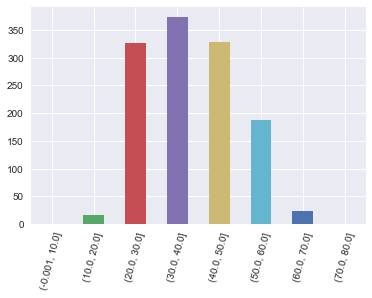

In [103]:
bins=pd.cut(df['Age.at.Discharge'], bins=[0,10,20,30,40,50,60,70,80], include_lowest=True)
ax=bins.value_counts(sort=False).plot.bar(rot=75, figsize=(6,4))
plt.show()

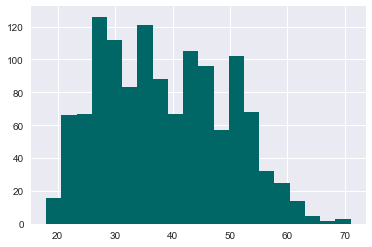

In [104]:
df['Age.at.Discharge'].hist(bins=20,color='#006666')

In [85]:
#tab10 = pd.crosstab(df['Age.at.Discharge'], df['Completion'])
#tab10

***
## 5) CHSR Changes from Admission to Discharge
***(Successful treatment/program performace looks like: CHSR dimensions decrease in severity over time)***

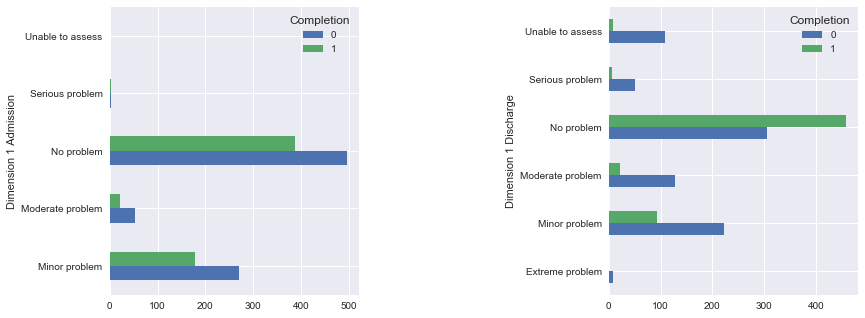

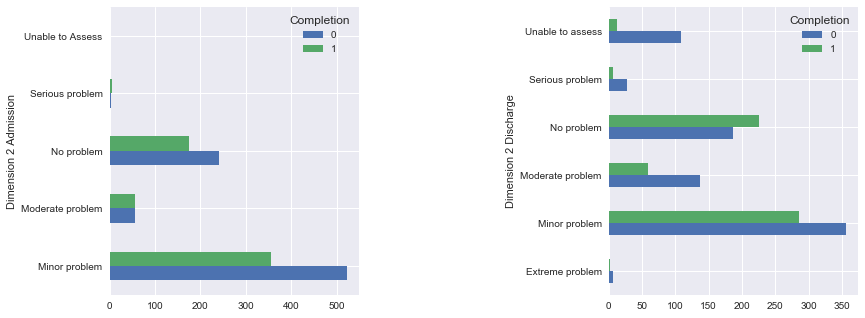

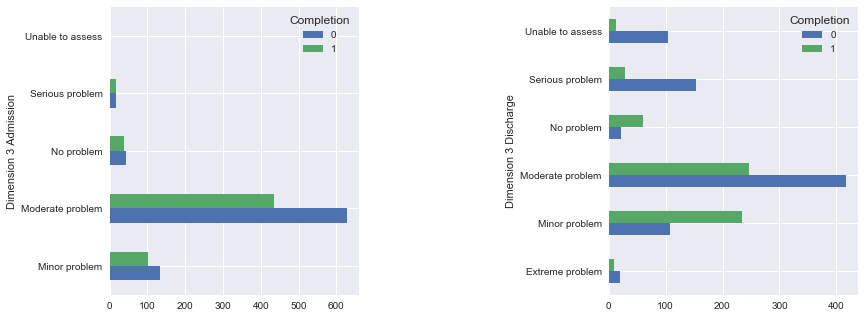

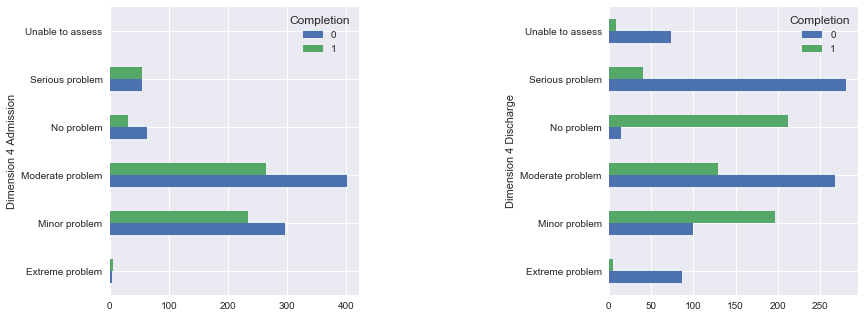

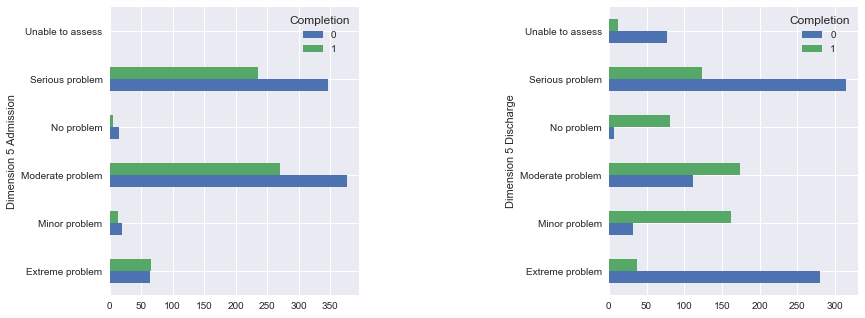

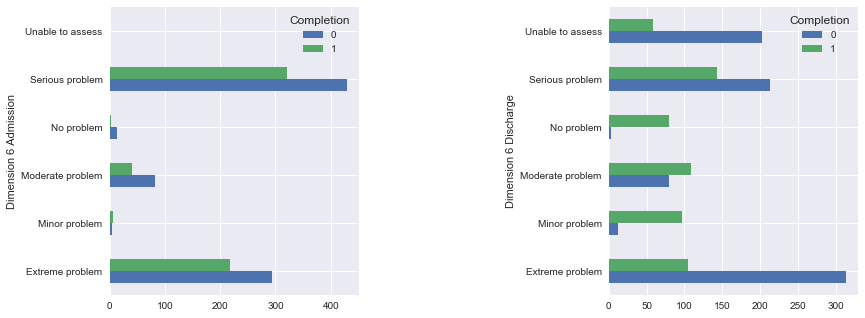

In [105]:
fig, ax=plt.subplots(1,2)
a= pd.crosstab(df['CHSR Dimension 1_admission'], df['Completion']).plot(ax=ax[0],kind = 'barh')
a.set_ylabel('Dimension 1 Admission')
b=pd.crosstab(df['CHSR Dimension 1_discharge'], df['Completion']).plot(ax=ax[1],kind = 'barh', figsize = (8,5))
b.set_ylabel('Dimension 1 Discharge')
plt.subplots_adjust(left=.2, bottom=.7, right=1.5, top=1.5,wspace=1,hspace=1)
fig, ax=plt.subplots(1,2)
c=pd.crosstab(df['CHSR Dimension 2_admission'], df['Completion']).plot(ax=ax[0],kind = 'barh', figsize = (8,5))
c.set_ylabel('Dimension 2 Admission')
d=pd.crosstab(df['CHSR Dimension 2_discharge'], df['Completion']).plot(ax=ax[1],kind = 'barh', figsize = (8,5))
d.set_ylabel('Dimension 2 Discharge')
plt.subplots_adjust(left=.2, bottom=.7, right=1.5, top=1.5,wspace=1,hspace=1)
fig, ax=plt.subplots(1,2)
e=pd.crosstab(df['CHSR Dimension 3_admission'], df['Completion']).plot(ax=ax[0],kind = 'barh', figsize = (8,5))
e.set_ylabel('Dimension 3 Admission')
f=pd.crosstab(df['CHSR Dimension 3_discharge'], df['Completion']).plot(ax=ax[1],kind = 'barh', figsize = (8,5))
f.set_ylabel('Dimension 3 Discharge')
plt.subplots_adjust(left=.2, bottom=.7, right=1.5, top=1.5,wspace=1,hspace=1)
fig, ax=plt.subplots(1,2)
g= pd.crosstab(df['CHSR Dimension 4_admission'], df['Completion']).plot(ax=ax[0],kind = 'barh')
g.set_ylabel('Dimension 4 Admission')
h=pd.crosstab(df['CHSR Dimension 4_discharge'], df['Completion']).plot(ax=ax[1],kind = 'barh', figsize = (8,5))
h.set_ylabel('Dimension 4 Discharge')
plt.subplots_adjust(left=.2, bottom=.7, right=1.5, top=1.5,wspace=1,hspace=1)
fig, ax=plt.subplots(1,2)
i=pd.crosstab(df['CHSR Dimension 5_admission'], df['Completion']).plot(ax=ax[0],kind = 'barh', figsize = (8,5))
i.set_ylabel('Dimension 5 Admission')
j=pd.crosstab(df['CHSR Dimension 5_discharge'], df['Completion']).plot(ax=ax[1],kind = 'barh', figsize = (8,5))
j.set_ylabel('Dimension 5 Discharge')
plt.subplots_adjust(left=.2, bottom=.7, right=1.5, top=1.5,wspace=1,hspace=1)
fig, ax=plt.subplots(1,2)
k=pd.crosstab(df['CHSR Dimension 6_admission'], df['Completion']).plot(ax=ax[0],kind = 'barh', figsize = (8,5))
k.set_ylabel('Dimension 6 Admission')
l=pd.crosstab(df['CHSR Dimension 6_discharge'], df['Completion']).plot(ax=ax[1],kind = 'barh', figsize = (8,5))
l.set_ylabel('Dimension 6 Discharge')
plt.subplots_adjust(left=.2, bottom=.7, right=1.5, top=1.5,wspace=1,hspace=1)

## Notes:
- "Unable to assess" appearing almost exclusively in discharge data can be translated as: those clients left the program without staff approval, so were not assessed at discharge

In [147]:
#create a df with only chsr data (admissions)
df2=df[['Completion','CHSR Dimension 1_admission','CHSR Dimension 2_admission','CHSR Dimension 3_admission','CHSR Dimension 4_admission','CHSR Dimension 5_admission','CHSR Dimension 6_admission']]
#df2.sample(3)

#create dummy variables for all of the dimensions
df2=pd.concat([pd.get_dummies(df2,columns=['CHSR Dimension 1_admission','CHSR Dimension 2_admission','CHSR Dimension 3_admission','CHSR Dimension 4_admission','CHSR Dimension 5_admission','CHSR Dimension 6_admission'], drop_first=True)], axis =1)
#df2.sample(3)

#converting 'completion' to numeric
df2['Completion']=pd.to_numeric(df2['Completion'])
#print(df2.dtypes)

In [148]:
#Running a logistic regression of admission chsr dimensions versus completion
cols=df2.columns[1:]
model=sm.Logit(df2['Completion'].astype(int),df2[cols])
result=model.fit()
result.summary2()

         Current function value: 0.669895
         Iterations: 35


/anaconda2/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                                     Results: Logit
========================================================================================================================
Model:                                  Logit                              No. Iterations:                     35.0000  
Dependent Variable:                     Completion                         Pseudo R-squared:                   0.019    
Date:                                   2018-04-05 00:46                   AIC:                                3116.7967
No. Observations:                       2292                               BIC:                                3248.7519
Df Model:                               22                                 Log-Likelihood:                     -1535.4  
Df Residuals:                           2269                               LL-Null:                            -1564.6  
Converged:                              0.0000                             Scale:                              1.0000   
------------------------------------------------------------------------------------------------------------------------
                                             Coef.      Std.Err.        z    P>|z|        [0.025             0.975]     
------------------------------------------------------------------------------------------------------------------------
CHSR Dimension 1_admission_Moderate problem -0.4636           0.2228 -2.0812 0.0374            -0.9003           -0.0270
CHSR Dimension 1_admission_No problem        0.1656           0.0983  1.6842 0.0921            -0.0271            0.3583
CHSR Dimension 1_admission_Serious problem   0.9416           0.8660  1.0873 0.2769            -0.7557            2.6390
CHSR Dimension 1_admission_Unable to assess -2.6648 57641672926.5707 -0.0000 1.0000 -112975602947.3810 112975602942.0513
CHSR Dimension 2_admission_Moderate problem  0.4269           0.1656  2.5777 0.0099             0.1023            0.7515
CHSR Dimension 2_admission_No problem        0.0440           0.1044  0.4220 0.6730            -0.1605            0.2486
CHSR Dimension 2_admission_Serious problem   0.2877           0.6411  0.4488 0.6536            -0.9689            1.5443
CHSR Dimension 2_admission_Unable to Assess -2.6648              nan     nan    nan                nan               nan
CHSR Dimension 3_admission_Moderate problem -0.1484           0.1187 -1.2500 0.2113            -0.3812            0.0843
CHSR Dimension 3_admission_No problem        0.4623           0.2354  1.9642 0.0495             0.0010            0.9236
CHSR Dimension 3_admission_Serious problem   0.0630           0.3209  0.1964 0.8443            -0.5659            0.6920
CHSR Dimension 3_admission_Unable to assess -2.6648              nan     nan    nan                nan               nan
CHSR Dimension 4_admission_Minor problem     0.0341           0.2313  0.1475 0.8828            -0.4192            0.4874
CHSR Dimension 4_admission_Moderate problem -0.0704           0.2223 -0.3167 0.7514            -0.5062            0.3654
CHSR Dimension 4_admission_No problem       -0.1667           0.2998 -0.5560 0.5782            -0.7542            0.4209
CHSR Dimension 4_admission_Serious problem   0.0363           0.2333  0.1555 0.8764            -0.4210            0.4935
CHSR Dimension 4_admission_Unable to assess -2.6648              nan     nan    nan                nan               nan
CHSR Dimension 5_admission_Minor problem    -0.6157           0.3497 -1.7606 0.0783            -1.3011            0.0697
CHSR Dimension 5_admission_Moderate problem -0.4561           0.2100 -2.1719 0.0299            -0.8677           -0.0445
CHSR Dimension 5_admission_No problem       -0.7570           0.7556 -1.0018 0.3164            -2.2379            0.7240
CHSR Dimension 5_admission_Serious problem  -0.4647           0.1830 -2.5399 0.0111            -0.8233           -0.1061
CHSR Dimens

Text(0.5,1,u'CHSR Dimensions and Completion - Admission')

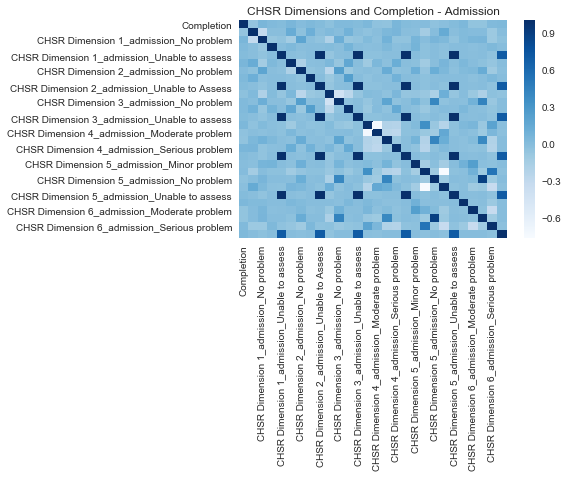

In [108]:
s=sns.heatmap(df2.corr(),cmap="Blues")
s.set_title('CHSR Dimensions and Completion - Admission')

In [111]:
#contingency tables for each pair
#not aligned with regression output. why is this?
tab1 = pd.crosstab(df['CHSR Dimension 1_admission'], df['Completion'])
tab2 = pd.crosstab(df['CHSR Dimension 2_admission'], df['Completion'])
tab3 = pd.crosstab(df['CHSR Dimension 3_admission'], df['Completion'])
tab4 = pd.crosstab(df['CHSR Dimension 5_admission'], df['Completion'])
tab5 = pd.crosstab(df['CHSR Dimension 6_admission'], df['Completion'])
print('**Table1**')
print(tab1)
print('**Table2**')
print(tab2)
print('**Table3**')
print(tab3)
print('**Table5**')
print(tab5)
print('**Table6**')
print(tab6)

#chi-square tests
chiTest1 = scipy.stats.chi2_contingency(tab1)
chiTest2 = scipy.stats.chi2_contingency(tab2)
chiTest3 = scipy.stats.chi2_contingency(tab3)
chiTest5 = scipy.stats.chi2_contingency(tab5)
chiTest6 = scipy.stats.chi2_contingency(tab6)

print('*** Test1 CHSR Dim 1 : Chi-square value, p-value and expected counts: ')
print(chiTest1)
print('*** Test2 CHSR Dim 2 : Chi-square value, p-value and expected counts: ')
print(chiTest2)
print('*** Test3 CHSR Dim 3 : Chi-square value, p-value and expected counts: ')
print(chiTest3)
print('*** Test5 CHSR Dim 5 : Chi-square value, p-value and expected counts: ')
print(chiTest5)
print('*** Test6 CHSR Dim 6 : Chi-square value, p-value and expected counts: ')
print(chiTest6)

**Table1**
Completion                    0    1
CHSR Dimension 1_admission          
Minor problem               270  179
Moderate problem             54   22
No problem                  496  386
Serious problem               2    3
Unable to assess              1    1
**Table2**
Completion                    0    1
CHSR Dimension 2_admission          
Minor problem               523  356
Moderate problem             55   55
No problem                  241  174
Serious problem               3    5
Unable to Assess              1    1
**Table3**
Completion                    0    1
CHSR Dimension 3_admission          
Minor problem               133  102
Moderate problem            629  434
No problem                   43   38
Serious problem              17   16
Unable to assess              1    1
**Table5**
Completion                    0    1
CHSR Dimension 6_admission          
Extreme problem             294  218
Minor problem                 4    7
Moderate problem             82

***

In [112]:
#discharge data
#create a df with only chsr data (discharge)
df3=df[['Completion','CHSR Dimension 1_discharge','CHSR Dimension 2_discharge','CHSR Dimension 3_discharge','CHSR Dimension 4_discharge','CHSR Dimension 5_discharge','CHSR Dimension 6_discharge']]
#df3.sample(3)

#create dummy variables for all of the dimensions
df3 = pd.concat([pd.get_dummies(df3, columns = ['CHSR Dimension 1_discharge','CHSR Dimension 2_discharge','CHSR Dimension 3_discharge','CHSR Dimension 4_discharge','CHSR Dimension 5_discharge','CHSR Dimension 6_discharge'], drop_first=True)], axis =1)
#df3.sample(3)

#converting 'completion' to numeric
df3['Completion'] = pd.to_numeric(df3['Completion'])
#print(df3.dtypes)

In [113]:
#Running a logistic regression of admission and discharge labor force regressors versus completion
cols = df3.columns[1:]
model = sm.Logit(df3['Completion'].astype(int),df3[cols])
result = model.fit()
result.summary2()

Optimization terminated successfully.
         Current function value: 0.429201
         Iterations 7


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                      Results: Logit
===========================================================================================
Model:                       Logit                     No. Iterations:            7.0000   
Dependent Variable:          Completion                Pseudo R-squared:          0.368    
Date:                        2018-04-05 00:16          AIC:                       1273.7811
No. Observations:            1414                      BIC:                       1431.4064
Df Model:                    29                        Log-Likelihood:            -606.89  
Df Residuals:                1384                      LL-Null:                   -960.99  
Converged:                   1.0000                    Scale:                     1.0000   
-------------------------------------------------------------------------------------------
                                             Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-------------------------------------------------------------------------------------------
CHSR Dimension 1_discharge_Minor problem     0.0221   1.0242  0.0215 0.9828 -1.9854  2.0295
CHSR Dimension 1_discharge_Moderate problem -0.5898   1.0481 -0.5628 0.5736 -2.6440  1.4643
CHSR Dimension 1_discharge_No problem        0.6247   1.0283  0.6075 0.5435 -1.3907  2.6402
CHSR Dimension 1_discharge_Serious problem  -0.8667   1.0678 -0.8117 0.4170 -2.9595  1.2261
CHSR Dimension 1_discharge_Unable to assess -1.8439   1.2987 -1.4198 0.1557 -4.3893  0.7014
CHSR Dimension 2_discharge_Minor problem    -1.0760   0.9744 -1.1043 0.2695 -2.9857  0.8337
CHSR Dimension 2_discharge_Moderate problem -1.2261   0.9833 -1.2469 0.2124 -3.1534  0.7012
CHSR Dimension 2_discharge_No problem       -1.4092   0.9833 -1.4331 0.1518 -3.3366  0.5181
CHSR Dimension 2_discharge_Serious problem  -1.3065   1.0629 -1.2292 0.2190 -3.3898  0.7767
CHSR Dimension 2_discharge_Unable to assess -0.3765   1.3252 -0.2841 0.7763 -2.9739  2.2209
CHSR Dimension 3_discharge_Minor problem    -1.7002   0.5666 -3.0008 0.0027 -2.8108 -0.5897
CHSR Dimension 3_discharge_Moderate problem -1.6667   0.5411 -3.0802 0.0021 -2.7272 -0.6061
CHSR Dimension 3_discharge_No problem       -2.0136   0.6578 -3.0609 0.0022 -3.3030 -0.7243
CHSR Dimension 3_discharge_Serious problem  -1.4059   0.5461 -2.5744 0.0100 -2.4763 -0.3356
CHSR Dimension 3_discharge_Unable to assess -1.9581   1.0293 -1.9024 0.0571 -3.9755  0.0592
CHSR Dimension 4_discharge_Minor problem     2.2080   0.5182  4.2607 0.0000  1.1923  3.2237
CHSR Dimension 4_discharge_Moderate problem  1.3028   0.4960  2.6265 0.0086  0.3306  2.2749
CHSR Dimension 4_discharge_No problem        3.8119   0.6112  6.2367 0.0000  2.6139  5.0098
CHSR Dimension 4_discharge_Serious problem   0.4856   0.4835  1.0043 0.3152 -0.4621  1.4333
CHSR Dimension 4_discharge_Unable to assess  2.3059   1.1107  2.0761 0.0379  0.1290  4.4828
CHSR Dimension 5_discharge_Minor problem     1.4915   0.3951  3.7749 0.0002  0.7171  2.2660
CHSR Dimension 5_discharge_Moderate problem  1.1987   0.3093  3.8749 0.0001  0.5924  1.8049
CHSR Dimension 5_discharge_No problem        1.1772   0.6362  1.8504 0.0643 -0.0697  2.4240
CHSR Dimension 5_discharge_Serious problem   0.4757   0.2545  1.8692 0.0616 -0.0231  0.9745
CHSR Dimension 5_discharge_Unable to assess  0.5467   0.9402  0.5815 0.5609 -1.2961  2.3895
CHSR Dimension 6_discharge_Minor problem     0.6848   0.4327  1.5825 0.1135 -0.1633  1.5328
CHSR Dimension 6_discharge_Moderate problem -0.1052   0.2641 -0.3982 0.6905 -0.6229  0.4125
CHSR Dimension 6_discharge_No problem        0.9911   0.7173  1.3818 0.1670 -0.4147  2.3970
CHSR Dimension 6_discharge_Serious problem  -0.0509   0.2027 -0.2510 0.8019 -0.4481  0.3464
CHSR Dimension 6_discharge_Unable to assess -0.9881   0.3236 -3.0537 0.0023 -1.6222 -0.3539
===========================================================================================

"""

Text(0.5,1,u'CHSR Dimensions and Completion - Discharge')

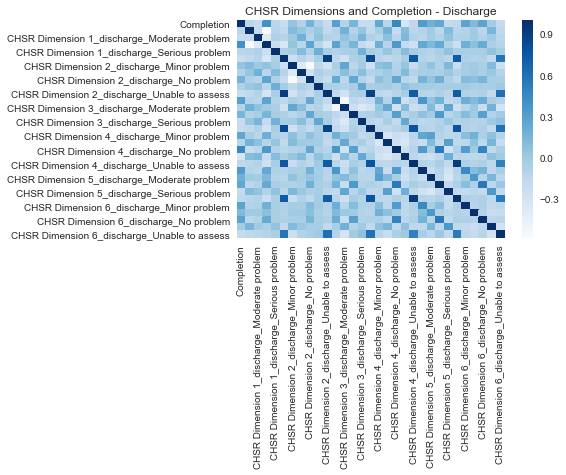

In [114]:
t=sns.heatmap(df3.corr(),cmap="Blues")
t.set_title('CHSR Dimensions and Completion - Discharge')

In [115]:
#contingency tables for each pair
#not aligned with regression output. why is this?
tab1_dis = pd.crosstab(df['CHSR Dimension 1_discharge'], df['Completion'])
tab3_dis = pd.crosstab(df['CHSR Dimension 3_discharge'], df['Completion'])
tab4_dis = pd.crosstab(df['CHSR Dimension 4_discharge'], df['Completion'])
tab5_dis = pd.crosstab(df['CHSR Dimension 5_discharge'], df['Completion'])
tab6_dis = pd.crosstab(df['CHSR Dimension 6_discharge'], df['Completion'])
print('**Table1**')
print(tab1)
print('**Table3**')
print(tab3)
print('**Table4**')
print(tab4)
print('**Table5**')
print(tab5)
print('**Table6**')
print(tab6)

#chi-square tests
chiTest1 = scipy.stats.chi2_contingency(tab1)
chiTest3 = scipy.stats.chi2_contingency(tab2)
chiTest4 = scipy.stats.chi2_contingency(tab3)
chiTest5 = scipy.stats.chi2_contingency(tab5)
chiTest6 = scipy.stats.chi2_contingency(tab6)

print('*** Test1 CHSR Dim 1 : Chi-square value, p-value and expected counts: ')
print(chiTest1)
print('*** Test2 CHSR Dim 3 : Chi-square value, p-value and expected counts: ')
print(chiTest3)
print('*** Test3 CHSR Dim 4 : Chi-square value, p-value and expected counts: ')
print(chiTest4)
print('*** Test5 CHSR Dim 5 : Chi-square value, p-value and expected counts: ')
print(chiTest5)
print('*** Test6 CHSR Dim 6 : Chi-square value, p-value and expected counts: ')
print(chiTest6)

**Table1**
Completion                    0    1
CHSR Dimension 1_admission          
Minor problem               270  179
Moderate problem             54   22
No problem                  496  386
Serious problem               2    3
Unable to assess              1    1
**Table3**
Completion                    0    1
CHSR Dimension 3_admission          
Minor problem               133  102
Moderate problem            629  434
No problem                   43   38
Serious problem              17   16
Unable to assess              1    1
**Table4**
Completion                    0    1
CHSR Dimension 5_admission          
Extreme problem              64   66
Minor problem                20   13
Moderate problem            377  270
No problem                   15    5
Serious problem             346  236
Unable to assess              1    1
**Table5**
Completion                    0    1
CHSR Dimension 6_admission          
Extreme problem             294  218
Minor problem                 4

***
# CHSR Summary

## Admission
Statistically significant regressors (using alpha=.05):

In [74]:
d = {'Regressor': ['CHSR 1','CHSR 2','CHSR 3','CHSR 5','CHSR 5','CHSR 6'],
     'Severity':['Moderate Problem','Moderate Problem','No Problem','Moderate Problem','Serious Problem','Serious Problem'],
     'pvalue': [.037, .0099,.0496,.0299,.0111,.0409]}
dfchsr_ad = pd.DataFrame(data=d)
dfchsr_ad

,Regressor,Severity,pvalue
0,CHSR 1,Moderate Problem,0.0370
1,CHSR 2,Moderate Problem,0.0099
2,CHSR 3,No Problem,0.0496
3,CHSR 5,Moderate Problem,0.0299
4,CHSR 5,Serious Problem,0.0111
5,CHSR 6,Serious Problem,0.0409


The findings from the logistic regression are not all supported when running a chi test - why is this?

## Discharge
Statistically significant regressors (using alpha=.05)

In [133]:
q = {'Regressor': ['CHSR 3','CHSR 3','CHSR 3','CHSR 3','CHSR 4','CHSR 4','CHSR 4','CHSR 4','CHSR 5','CHSR 5','CHSR 6'],
     'Severity':['Minor Problem','Moderate Problem','No Problem','Serious Problem','Minor Problem','Moderate Problem','No Problem',
                'Unable to Assess','Minor Problem','Moderate Problem','Unable to Assess' ],
     'pvalue': [.0027,.0021,.0022,.0100,.0000,.0086,.0000,.0379,.0002,.0001,.0023]}
dfchsr_dis = pd.DataFrame(data=q)
dfchsr_dis

,Regressor,Severity,pvalue
0,CHSR 3,Minor Problem,0.0027
1,CHSR 3,Moderate Problem,0.0021
2,CHSR 3,No Problem,0.0022
3,CHSR 3,Serious Problem,0.0100
4,CHSR 4,Minor Problem,0.0000
5,CHSR 4,Moderate Problem,0.0086
6,CHSR 4,No Problem,0.0000
7,CHSR 4,Unable to Assess,0.0379
8,CHSR 5,Minor Problem,0.0002
9,CHSR 5,Moderate Problem,0.0001


The findings from the logistic regression are not all supported when running a chi test - why is this?

***
## 6) Labor Force Status
### Note: Current Labor = Admission, Current Labor Force Status = Discharge

AxesSubplot(0.125,0.125;0.775x0.755)


,Completion Rate (%),Current Labor Force Status - Admission
0,40.5,Disabled
1,53.0,Employed full-time (>=35 hours/week)
2,50.0,Employed part-time (<35 hours/week)
3,100.0,Homemaker
4,00.0,Inmate of institution
5,42.0,Laid off/unemployed - looking for work
6,41.7,Laid off/unemployed - not looking for work
7,00.0,Occassional/seasonal work
8,41.7,Other
9,100.0,Retired


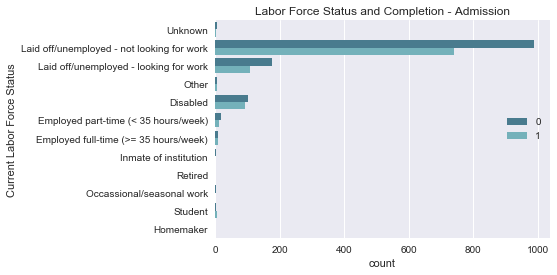

In [167]:
#admission
d=sns.countplot(data=df, y='Current labor status', hue='Completion',palette='GnBu_d')
d.set_ylabel('Current Labor Force Status')
d.legend(loc=5)
d.set_title('Labor Force Status and Completion - Admission')
print(d)
tab5_cr= {'Current Labor Force Status - Admission': ['Disabled','Employed full-time (>=35 hours/week)','Employed part-time (<35 hours/week)','Homemaker','Inmate of institution','Laid off/unemployed - looking for work','Laid off/unemployed - not looking for work','Occassional/seasonal work','Other','Retired','Student','Unknown'],
     'Completion Rate (%)':['40.5','53.0','50.0','100.0','00.0','42.0','41.7','00.0','41.7','100.0','50.0','28.6']}
tab5_cr = pd.DataFrame(data=tab5_cr)
tab5_cr
#tab5 = pd.crosstab(df['Current labor status'], df['Completion'])
#tab5

AxesSubplot(0.125,0.125;0.775x0.755)


,Completion Rate (%),Current Labor Force Status - Discharge
0,45.5,Disabled
1,77.4,Employed full-time (>=35 hours/week)
2,46.5,Employed part-time (<35 hours/week)
3,25.0,Homemaker
4,00.0,Inmate of institution
5,74.2,Laid off/unemployed - looking for work
6,32.4,Laid off/unemployed - not looking for work
7,50.0,Occassional/seasonal work
8,47.8,Other
9,66.7,Retired


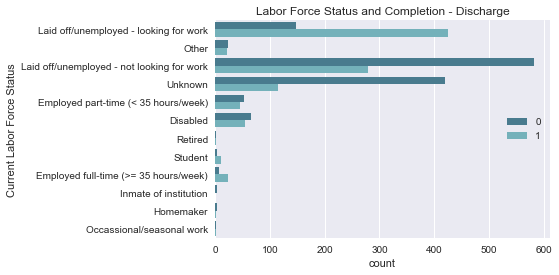

In [168]:
#discharge
e=sns.countplot(data=df, y='Current labor force status', hue='Completion',palette='GnBu_d')
e.set_ylabel('Current Labor Force Status')
e.legend(loc=5)
e.set_title('Labor Force Status and Completion - Discharge')
print(e)
tab6_cr= {'Current Labor Force Status - Discharge': ['Disabled','Employed full-time (>=35 hours/week)','Employed part-time (<35 hours/week)','Homemaker','Inmate of institution','Laid off/unemployed - looking for work','Laid off/unemployed - not looking for work','Occassional/seasonal work','Other','Retired','Student','Unknown'],
     'Completion Rate (%)':['45.5','77.4','46.5','25.0','00.0','74.2','32.4','50.0','47.8','66.7','78.6','21.3']}
tab6_cr = pd.DataFrame(data=tab6_cr)
tab6_cr
#tab6 = pd.crosstab(df['Current labor force status'], df['Completion'])
#tab6

In [144]:
#run a logistic regression of labor force status in admissions and discharge against completion

#create a df with only labor force data
df4=df[['Completion','Current labor status']]
#df4.sample(3)

#create dummy variables for all of the levels of the labor force variable
df4=pd.concat([pd.get_dummies(df4, columns = ['Current labor status'], drop_first=True)], axis =1)
#df4.sample(3)

#converting 'completion' to numeric
df4['Completion'] = pd.to_numeric(df4['Completion'])
#print(df4.dtypes)

In [145]:
#Running a logistic regression of admission and discharge labor force regressors versus completion
cols = df4.columns[1:]
model = sm.Logit(df4['Completion'].astype(int),df4[cols])
result = model.fit()
result.summary2()

         Current function value: 0.679385
         Iterations: 35


/anaconda2/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                                       Results: Logit
============================================================================================================================
Model:                                  Logit                                No. Iterations:                       35.0000  
Dependent Variable:                     Completion                           Pseudo R-squared:                     0.005    
Date:                                   2018-04-05 00:46                     AIC:                                  3136.3002
No. Observations:                       2292                                 BIC:                                  3199.4092
Df Model:                               10                                   Log-Likelihood:                       -1557.2  
Df Residuals:                           2281                                 LL-Null:                              -1564.6  
Converged:                              0.0000                               Scale:                                1.0000   
----------------------------------------------------------------------------------------------------------------------------
                                                                 Coef.     Std.Err.     z    P>|z|     [0.025       0.975]  
----------------------------------------------------------------------------------------------------------------------------
Current labor status_Employed full-time (>= 35 hours/week)        0.2231      0.4743  0.4704 0.6380      -0.7065      1.1528
Current labor status_Employed part-time (< 35 hours/week)        -0.4925      0.3827 -1.2868 0.1982      -1.2426      0.2576
Current labor status_Homemaker                                   23.8600 151753.5162  0.0002 0.9999 -297407.5662 297455.2863
Current labor status_Inmate of institution                      -13.6138    639.2764 -0.0213 0.9830   -1266.5725   1239.3449
Current labor status_Laid off/unemployed - looking for work      -0.4734      0.1220 -3.8800 0.0001      -0.7126     -0.2343
Current labor status_Laid off/unemployed - not looking for work  -0.2904      0.0486 -5.9707 0.0000      -0.3857     -0.1951
Current labor status_Occassional/seasonal work                  -13.6138    639.2764 -0.0213 0.9830   -1266.5725   1239.3449
Current labor status_Other                                        0.0000      0.5345  0.0000 1.0000      -1.0476      1.0476
Current labor status_Retired                                     23.8600 151753.5162  0.0002 0.9999 -297407.5662 297455.2863
Current labor status_Student                                      0.5596      0.6268  0.8928 0.3719      -0.6689      1.7881
Current labor status_Unknown                                     -0.5108      0.7303 -0.6995 0.4843      -1.9422      0.9205
============================================================================================================================

"""